<center><h1 style="color: #011f4b;">PROYECTO DE CLASE - ANÁLISIS DE SERIES DE TIEMPO</h1></center>

<center><h2 style="color: #03396c;">SERIE: ANALISIS TEMPORAL DE IMPORTACIONES</h2></center>

<span style="color: #03396c;">**Autor:**</span>
- Cesar Prieto

<h2 style="color: #03396c;">INTRODUCCION</h2>

Esta serie consta del valor FOB en dólares de las importaciones que llegan a los puertos de Colombia vía marítima y su destino final es la ciudad de Bogotá, en el periodo transcurrido entre enero del 2012 hasta diciembre de 2021, la serie es de tipo **mensual**.

**Definición:** El valor FOB en dólares de la mercancía, es valor de la mercancía en el momento que se carga a bordo del medio de transporte, en este caso el marítimo.

La serie consta de 120 observaciones, lo que corresponde a los 10 años transcurridos desde el 2012 hasta el 2021

<span style="color: #03396c;">**Descripcion de la base:**</span>
- Importaciones <span style="color: #03396c;">**MENSUALES**</span> via maritima con destino a Bogotá
- 3401 Datos tomado (Desde el 01/2012 Hasta 12/2021)
- Variable a usar: <span style="color: #03396c;">**_VAFODO_**</span>

<center><h1 style="color: #011f4b;">PRIMER ANALISIS Y DESCRIPCION DE LA SERIE</h1></center>

<h2 style="color: #011f4b;">IMPORTACION Y LIMPIEZA DE DATOS</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from sklearn import __version__ as sklearn_version
from sklearn import *

import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
current_dir = os.getcwd()
pro_series_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))
pro_series_dir

'C:\\Users\\Cesar Prieto\\Documents\\REPOS GIT\\Pro-Series\\Pro-Series'

In [4]:
# Construir la ruta a la carpeta de Datos
data_folder_path = os.path.join(pro_series_dir, 'Datos')
data_folder_path = data_folder_path + os.sep
data_folder_path

'C:\\Users\\Cesar Prieto\\Documents\\REPOS GIT\\Pro-Series\\Pro-Series\\Datos\\'

In [5]:
# Cargar el archivo CSV en un DataFrame de pandas
Importaciones = pd.read_csv(data_folder_path + "Importaciones.csv", sep=',')

In [6]:
Importaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FECH            143 non-null    float64
 1   VACIP           144 non-null    int64  
 2   VAFODO          144 non-null    float64
 3   FLETE           144 non-null    float64
 4   IMP1            144 non-null    float64
 5   VACID           144 non-null    float64
 6   PBK             144 non-null    float64
 7   PNK             144 non-null    float64
 8   CANU            81 non-null     float64
 9   fecha           144 non-null    object 
 10  mes             144 non-null    object 
 11  año             144 non-null    int64  
 12  fecha_completa  144 non-null    object 
dtypes: float64(8), int64(2), object(3)
memory usage: 14.8+ KB


In [7]:
#Exploracion de las variables encontradas en la base
Variables = Importaciones[['fecha_completa', 'VACIP', 'VAFODO', 'FLETE', 'IMP1', 'VACID', 'PBK', 'PNK']].copy()

# Convertir la columna 'fecha_completa' a formato de fecha
Variables['fecha_completa'] = pd.to_datetime(Variables['fecha_completa'])

Variables.info()
Variables.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha_completa  144 non-null    datetime64[ns]
 1   VACIP           144 non-null    int64         
 2   VAFODO          144 non-null    float64       
 3   FLETE           144 non-null    float64       
 4   IMP1            144 non-null    float64       
 5   VACID           144 non-null    float64       
 6   PBK             144 non-null    float64       
 7   PNK             144 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 9.1 KB


fecha_completa          VACIP        VAFODO         FLETE          IMP1  \
0     2012-01-01   869285742501  1.579419e+10  1.039715e+11  9.063473e+10   
1     2012-02-01   753291179381  1.787081e+10  5.944155e+10  8.521563e+10   
2     2012-03-01   970221001405  1.969805e+10  8.800024e+10  1.190929e+11   
3     2012-04-01   829378952699  1.597839e+10  8.199698e+10  1.523165e+11   
4     2012-05-01  1041614618811  2.355538e+10  1.157984e+11  1.217380e+11   

          VACID           PBK           PNK  
0  2.243658e+12  2.727896e+10  5.725524e+09  
1  1.327547e+12  6.703622e+09  1.794043e+10  
2  1.990896e+12  2.428291e+10  5.363545e+09  
3  1.724013e+12  1.018825e+10  5.578638e+09  
4  2.454812e+12  2.360439e+10  6.344622e+09

In [8]:
Variables[['VACIP', 'VAFODO', 'FLETE', 'IMP1', 'VACID', 'PBK', 'PNK']] = Variables[['VACIP', 'VAFODO', 'FLETE', 'IMP1', 'VACID', 'PBK', 'PNK']].div(1000000000)
Variables.head(5)

fecha_completa        VACIP     VAFODO       FLETE        IMP1        VACID  \
0     2012-01-01   869.285743  15.794190  103.971527   90.634731  2243.657871   
1     2012-02-01   753.291179  17.870806   59.441549   85.215632  1327.547259   
2     2012-03-01   970.221001  19.698045   88.000244  119.092896  1990.895960   
3     2012-04-01   829.378953  15.978388   81.996980  152.316541  1724.013363   
4     2012-05-01  1041.614619  23.555380  115.798390  121.737966  2454.811904   

         PBK        PNK  
0  27.278956   5.725524  
1   6.703622  17.940430  
2  24.282915   5.363545  
3  10.188252   5.578638  
4  23.604388   6.344622

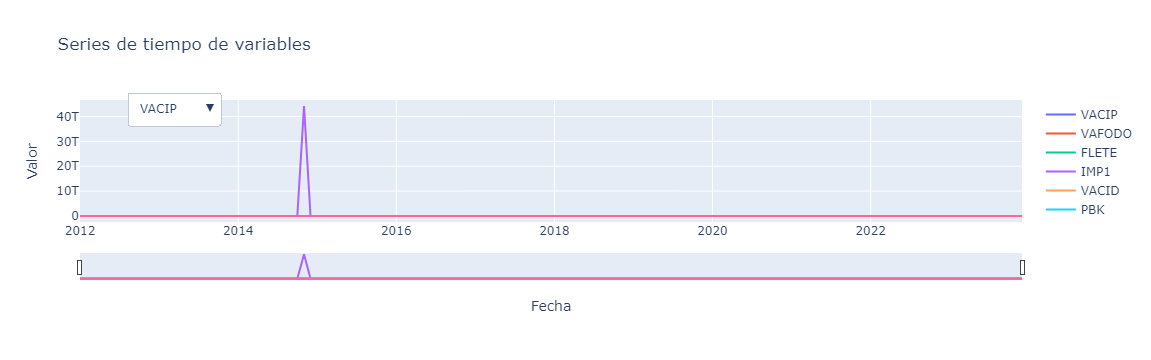

In [9]:
import plotly.graph_objects as go

# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['VACIP'], mode='lines', name='VACIP'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['VAFODO'], mode='lines', name='VAFODO'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['FLETE'], mode='lines', name='FLETE'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['IMP1'], mode='lines', name='IMP1'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['VACID'], mode='lines', name='VACID'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['PBK'], mode='lines', name='PBK'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['PNK'], mode='lines', name='PNK'))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="VACIP",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False, False]},
                           {"title": "Serie de tiempo variable VACIP"}]),
                dict(label="VAFODO",
                     method="update",
                     args=[{"visible": [False, True, False, False, False, False, False]},
                           {"title": "Serie de tiempo variable VAFODO"}]),
                dict(label="FLETE",
                     method="update",
                     args=[{"visible": [False, False, True, False, False, False, False]},
                           {"title": "Serie de tiempo variable FLETE"}]),
                dict(label="IMP1",
                     method="update",
                     args=[{"visible": [False, False, False, True, False, False, False]},
                           {"title": "Serie de tiempo variable IMP1"}]),
                dict(label="VACID",
                     method="update",
                     args=[{"visible": [False, False, False, False, True, False, False]},
                           {"title": "Serie de tiempo variable VACID"}]),
                dict(label="PBK",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, True, False]},
                           {"title": "Serie de tiempo variable PBK"}]),
                dict(label="PNK",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False, True]},
                           {"title": "Serie de tiempo variable PNK"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Series de tiempo de variables')

# Mostrar el gráfico
fig.show()

<h2 style="color: #011f4b;">ELECCION DE LA VARIABLE Y DESARROLLO DE METODOLOGIAS</h2>

En la parte anterior del codigo pudimos ver como todas las variables poseen un comportamiento bastante diferente. Por esto hemos decidido que la variable elegida para desarrollar el proyecto sera la  <span style="color: #03396c;">**_VAFODO_**</span> o mejor dicho el Valor FOB dólares de la mercancía. Valor de la mercancia  en el momento que se carga a bordo del medio de transporte  marítimo.

In [10]:
# Seleccionar solo las columnas 'fecha_completa' y 'VAFODO'
Serie = Variables[['fecha_completa', 'VAFODO']]
print(Serie)

    fecha_completa      VAFODO
0       2012-01-01   15.794190
1       2012-02-01   17.870806
2       2012-03-01   19.698045
3       2012-04-01   15.978388
4       2012-05-01   23.555380
..             ...         ...
139     2023-08-01   94.747376
140     2023-09-01   89.642116
141     2023-10-01    1.523791
142     2023-11-01  109.342708
143     2023-12-01   95.723639

[144 rows x 2 columns]


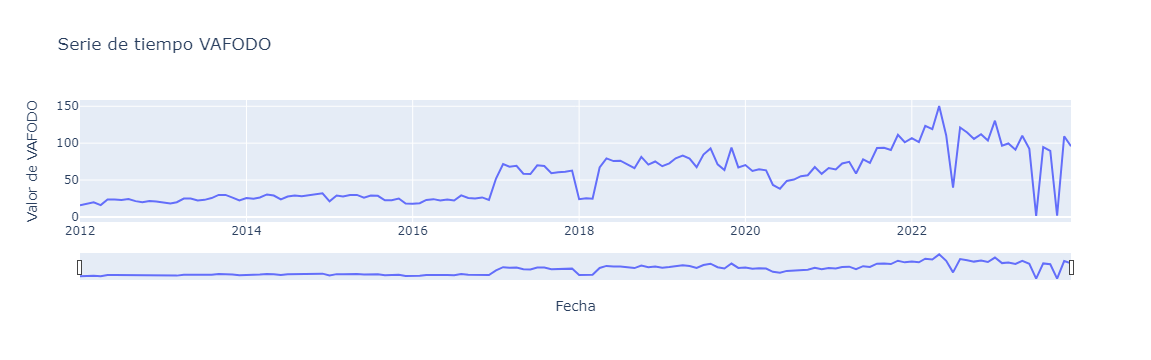

In [11]:
import plotly.graph_objects as go
import pandas as pd

# Crear la serie de tiempo con Pandas Time Series (ts)
VAFODO_series = pd.Series(Serie['VAFODO'].values, index=Serie['fecha_completa'])

# Crear la figura de Plotly
fig = go.Figure()

# Agregar la serie de tiempo al gráfico
fig.add_trace(go.Scatter(x=VAFODO_series.index, y=VAFODO_series.values, mode='lines'))

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor de VAFODO')

# Actualizar el título del gráfico
fig.update_layout(title='Serie de tiempo VAFODO')

# Mostrar el gráfico
fig.show()

<h3 style="color: #011f4b;">TRANSFORMACION DE BOX-COX PARA REDUCCION DE LA VARIANZA</h3>

In [12]:
import numpy as np
from scipy import stats
from scipy.stats import boxcox
import matplotlib.pyplot as plt

In [13]:
# Calcular el lambda óptimo para la transformación de Box-Cox
fitted_data, fitted_lambda = stats.boxcox(Serie['VAFODO'])
print("Lambda óptimo para Box-Cox:", fitted_lambda)

# Aplicar la transformación de Box-Cox a la serie de tiempo de Apertura
serie_boxcox = boxcox(Serie['VAFODO'], lmbda=fitted_lambda)
print(serie_boxcox)

Lambda óptimo para Box-Cox: 0.40834707479923404
[ 5.10852085  5.49950711  5.82184441  5.14438814  6.44842952  6.4412316
  6.34582517  6.53071295  6.10329901  5.8546702   6.10864499  6.02805918
  5.71646829  5.5638126   5.85791619  6.65395667  6.63815599  6.24445826
  6.37800192  6.74050423  7.33673943  7.34544084  6.82506812  6.24993519
  6.74336775  6.62145455  6.8578093   7.43456938  7.23406832  6.46011486
  7.05232672  7.23189589  7.10665996  7.3047484   7.39371961  7.63645326
  6.06386807  7.22925318  7.06795631  7.34741043  7.34928454  6.83707819
  7.24164381  7.17772518  6.28148124  6.29379786  6.64494545  5.52038758
  5.50730646  5.60673818  6.36419625  6.52656844  6.2377567   6.43884013
  6.24841702  7.25660489  6.74444002  6.66747022  6.86879468  6.36899605
  9.84649471 11.56385693 11.27722176 11.37365638 10.45622964 10.41502527
 11.42312264 11.35079527 10.50665686 10.64446897 10.68308436 10.8247758
  6.50110839  6.68873166  6.62318603 11.18183475 12.16376963 11.87993335
 11.9

<h3 style="color: #011f4b;">ESTIMACION DE LA TENDENCIA USANDO SPLINES</h3>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

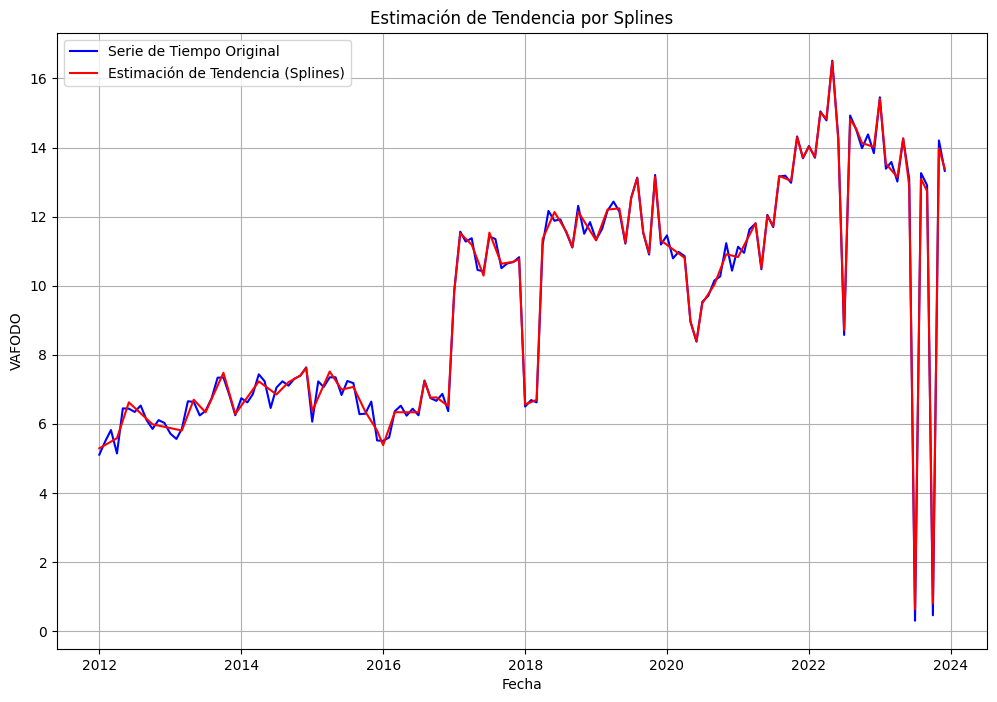

In [15]:
# Convertir la serie de tiempo a un DataFrame de pandas
df_BoxCox = pd.DataFrame({'Fecha': Serie['fecha_completa'], 'BoxCox': serie_boxcox})
df_BoxCox.set_index('Fecha', inplace=True)  # Establecer la columna 'Fecha' como el índice de tiempo

# Ajuste de splines para estimar la tendencia
dates = df_BoxCox.index.to_julian_date()  # Convertir las fechas a días julianos para facilitar el ajuste spline
values = df_BoxCox['BoxCox'].values

# Ajustar un spline cúbico suave
spline = UnivariateSpline(dates, values, k=1, s = 5)  # k=3 para un spline cúbico
trend_spline = spline(dates)  # Valores estimados de la tendencia

# Graficar la serie de tiempo original y la tendencia estimada por splines
plt.figure(figsize=(12, 8))
plt.plot(df_BoxCox.index, df_BoxCox['BoxCox'], label='Serie de Tiempo Original', color='blue')
plt.plot(df_BoxCox.index, trend_spline, label='Estimación de Tendencia (Splines)', color='red')
plt.xlabel('Fecha')
plt.ylabel('VAFODO')
plt.title('Estimación de Tendencia por Splines')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Serie sin tendencia (remover la tendencia estimada por splines)
sin_tendencia_spline = df_BoxCox['BoxCox'] - trend_spline

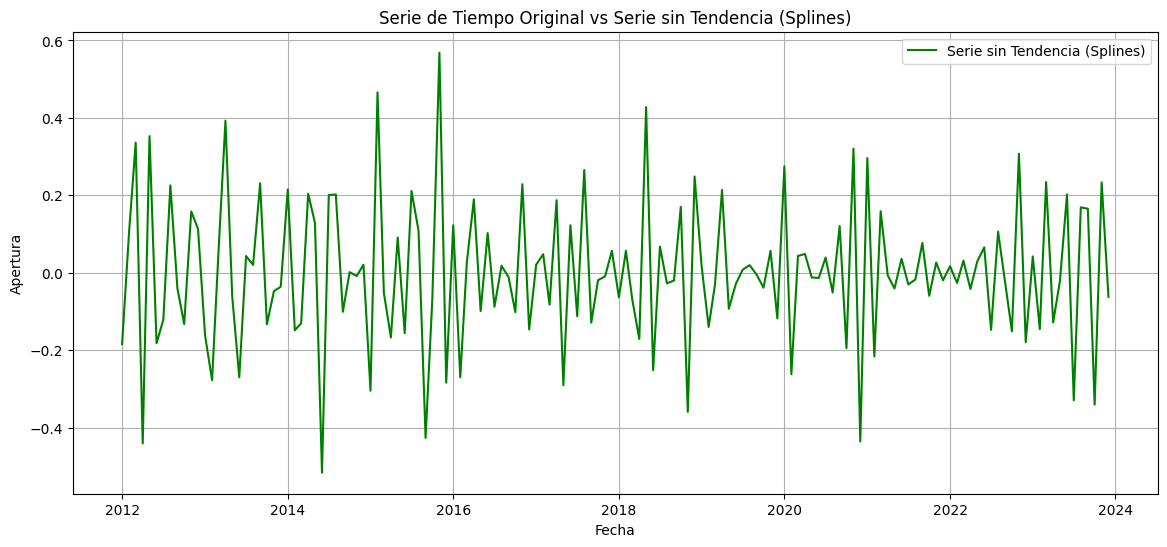

In [17]:
# Serie sin tendencia (remover la tendencia estimada por splines)
sin_tendencia_spline = df_BoxCox['BoxCox'] - trend_spline

# Graficar la serie de tiempo original y la serie sin tendencia por splines
plt.figure(figsize=(14, 6))
plt.plot(df_BoxCox.index, sin_tendencia_spline, label='Serie sin Tendencia (Splines)', color='green')
plt.xlabel('Fecha')
plt.ylabel('Apertura')
plt.title('Serie de Tiempo Original vs Serie sin Tendencia (Splines)')
plt.legend()
plt.grid(True)
plt.show()

<h3 style="color: #011f4b;">DIFERENCIA ORDINARA</h3>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller

In [19]:
# Serie Diferenciada
Diff_BoxCox = np.diff(serie_boxcox, n=1)

# AR Model para la serie diferenciada
model_ar_diff = AutoReg(Diff_BoxCox, lags=1)
results_ar_diff = model_ar_diff.fit()

# Prueba de Dickey-Fuller para determinar estacionariedad en la serie diferenciada
adf_result_diff = adfuller(Diff_BoxCox, maxlag=12, regression="c", autolag="AIC")
print("\nResultado de la prueba de Dickey-Fuller para serie diferenciada:")
print("Estadístico ADF:", adf_result_diff[0])
print("Valor crítico al 1%:", adf_result_diff[4]['1%'])
print("Valor crítico al 5%:", adf_result_diff[4]['5%'])
print("Valor crítico al 10%:", adf_result_diff[4]['10%'])
print("Es estacionaria (p-valor):", adf_result_diff[1] < 0.05)


Resultado de la prueba de Dickey-Fuller para serie diferenciada:
Estadístico ADF: -3.3972277782274576
Valor crítico al 1%: -3.481281802271349
Valor crítico al 5%: -2.883867891664528
Valor crítico al 10%: -2.5786771965503177
Es estacionaria (p-valor): True


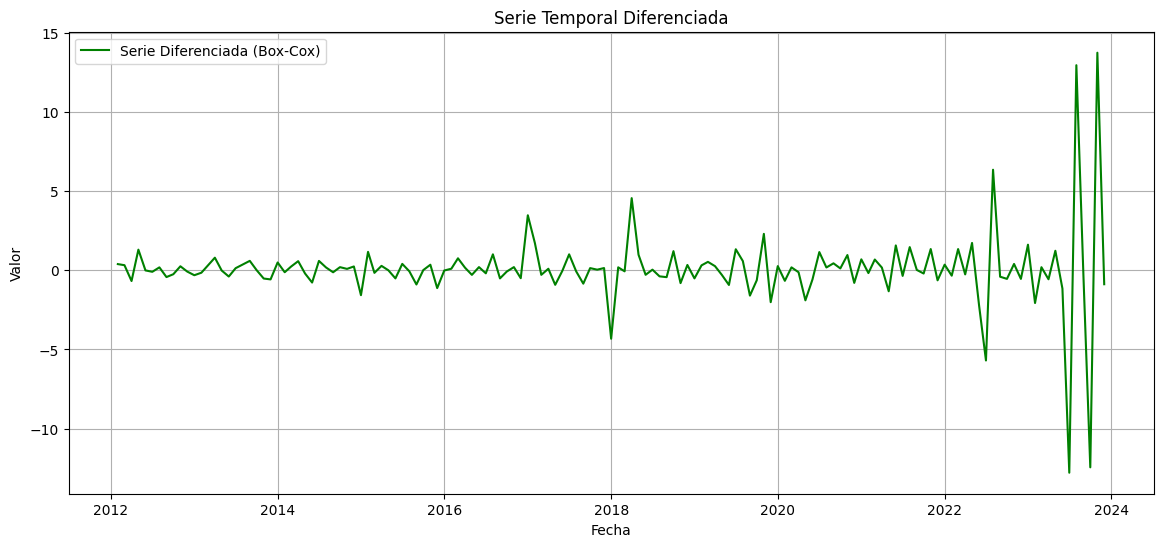

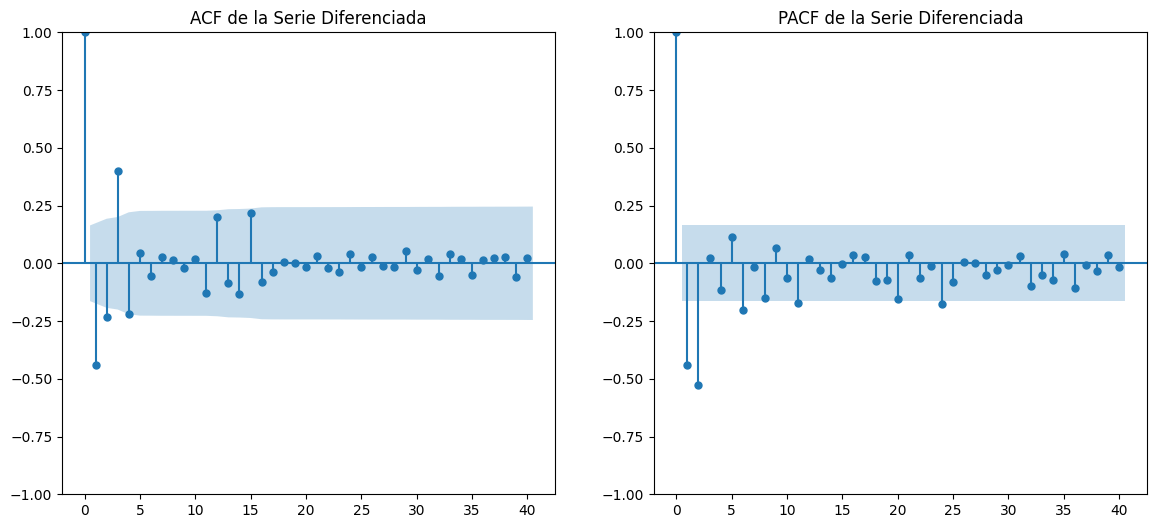

In [20]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Crear DataFrame para la serie diferenciada con la misma longitud que la serie original
diff_df = pd.DataFrame({'Fecha': Serie['fecha_completa'][1:], 'Diff_BoxCox': Diff_BoxCox})

# Graficar la serie diferenciada
plt.figure(figsize=(14, 6))
plt.plot(diff_df['Fecha'], diff_df['Diff_BoxCox'], label='Serie Diferenciada (Box-Cox)', color='green')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Temporal Diferenciada')
plt.legend()
plt.grid(True)
plt.show()

# Graficar ACF y PACF para la serie diferenciada
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(Diff_BoxCox, lags=40, ax=plt.gca())
plt.title('ACF de la Serie Diferenciada')

plt.subplot(122)
plot_pacf(Diff_BoxCox, lags=40, method='ywm', ax=plt.gca())
plt.title('PACF de la Serie Diferenciada')

plt.show()

<h3 style="color: #011f4b;">INDICE DE INFORMAICON MUTUA (AMI) </h3>

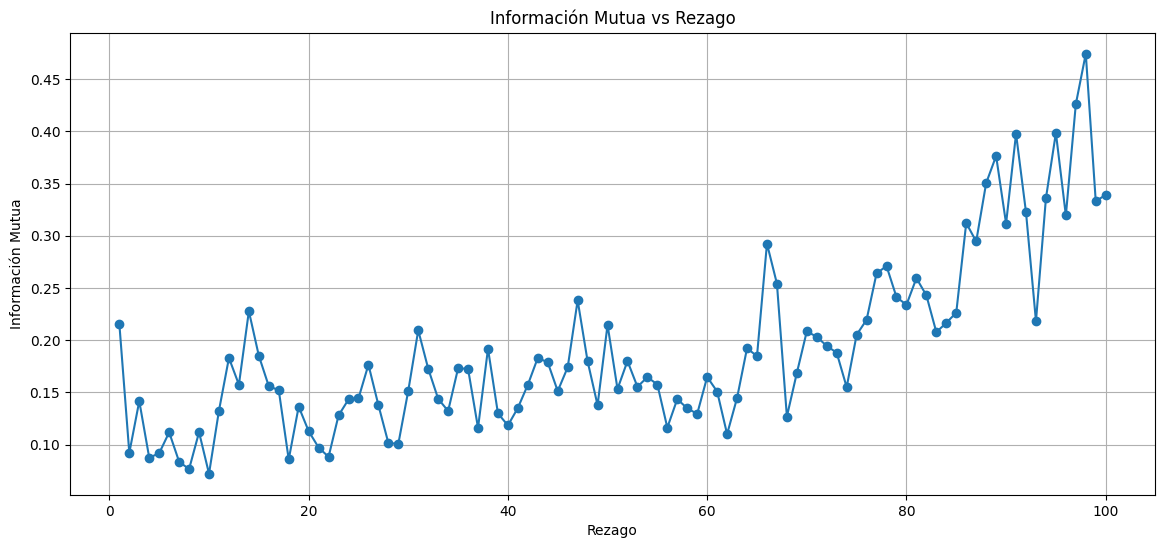

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Función para calcular la información mutua
def mutual_information(x, y, bins=10):
    hist_xy, _, _ = np.histogram2d(x, y, bins=bins, density=True)
    hist_x, _ = np.histogram(x, bins=bins, density=True)
    hist_y, _ = np.histogram(y, bins=bins, density=True)
    
    entropy_xy = entropy(hist_xy.flatten())
    entropy_x = entropy(hist_x)
    entropy_y = entropy(hist_y)
    
    mi = entropy_x + entropy_y - entropy_xy
    return mi

# Calcular la información mutua para diferentes rezagos
lag_values = np.arange(1, 101)
mutual_info_values = [
    mutual_information(
        diff_df['Diff_BoxCox'].iloc[:-lag].values,  # Extraer solo la columna 'Diff_BoxCox'
        diff_df['Diff_BoxCox'].iloc[lag:].values
    ) for lag in lag_values
]

# Graficar la información mutua en función del rezago
plt.figure(figsize=(14, 6))
plt.plot(lag_values, mutual_info_values, marker='o', linestyle='-')
plt.title('Información Mutua vs Rezago')
plt.xlabel('Rezago')
plt.ylabel('Información Mutua')
plt.grid(True)
plt.show()

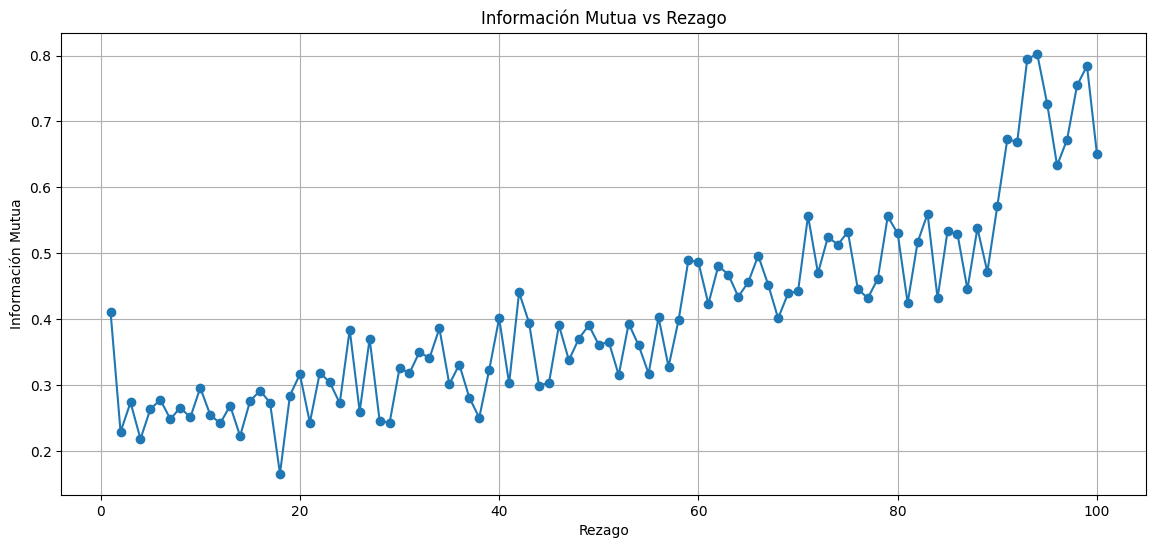

In [22]:
# Calcular la información mutua para diferentes rezagos
lag_values = np.arange(1, 101)
mutual_info_values = [
    mutual_information(
        sin_tendencia_spline.iloc[:-lag].values,  # Extraer solo la columna 'Diff_BoxCox'
        sin_tendencia_spline.iloc[lag:].values
    ) for lag in lag_values
]

# Graficar la información mutua en función del rezago
plt.figure(figsize=(14, 6))
plt.plot(lag_values, mutual_info_values, marker='o', linestyle='-')
plt.title('Información Mutua vs Rezago')
plt.xlabel('Rezago')
plt.ylabel('Información Mutua')
plt.grid(True)
plt.show()


<h3 style="color: #011f4b;">DETECCION DE ESTACIONALIDAD</h3>

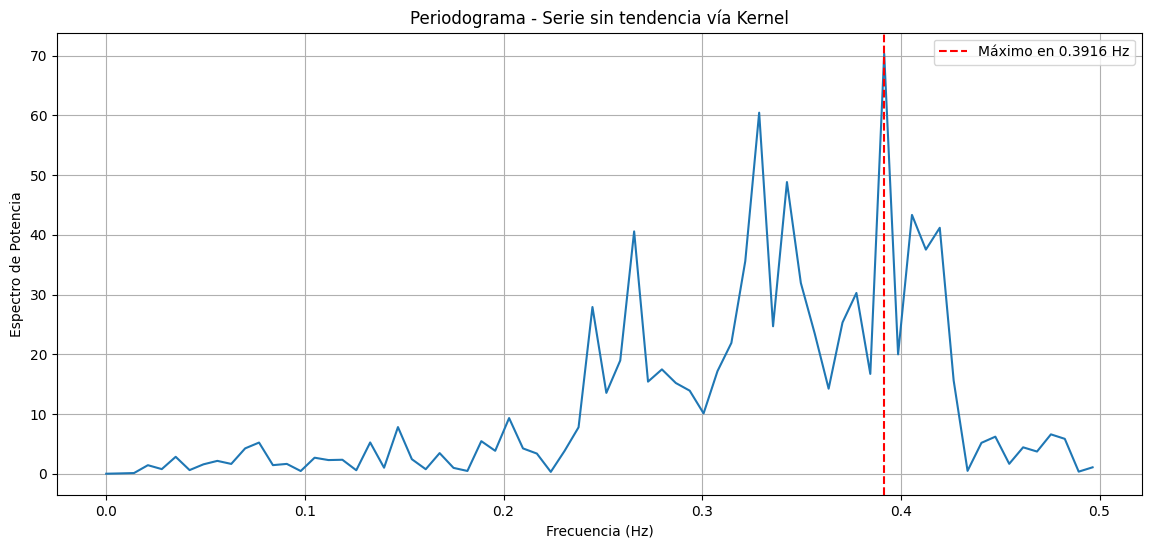

Frecuencia dominante: 0.39
Periodo dominante: 2.55 unidades de tiempo


In [23]:
from scipy.signal import periodogram

# Calcular el periodograma (espectro de potencia) de la serie diferenciada
frequencies, spectrum = periodogram(diff_df['Diff_BoxCox'])

# Encontrar la frecuencia correspondiente al máximo del espectro
max_frequency = frequencies[np.argmax(spectrum)]
periodo = 1 / max_frequency

# Graficar el periodograma
plt.figure(figsize=(14, 6))
plt.plot(frequencies, spectrum)
plt.axvline(max_frequency, color='red', linestyle='--', label=f'Máximo en {max_frequency:.4f} Hz')
plt.title('Periodograma - Serie sin tendencia vía Kernel')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Espectro de Potencia')
plt.legend()
plt.grid(True)
plt.show()

# Calcular el periodo correspondiente a la frecuencia máxima
print(f'Frecuencia dominante: {max_frequency:.2f}')
print(f'Periodo dominante: {periodo:.2f} unidades de tiempo')

<center><h1 style="color: #011f4b;">ÁRBOLES DE DEDICIÓN SERIE SIN TENDENCIA POR SPLINES</h1></center>

Para esta seccion nos proponemos a realizar el analisis a partir de la metodologia de "Arboles de decision" la cual en el contexto de series de temporales nos permiten tener las siguiente herramientas para el analisis: 

- Prediccion de tendencia futuras: Los árboles de decisión pueden ayudar a identificar relaciones complejas entre variables y predecir cómo evolucionará una serie temporal en el futuro.
- Modelado de dependencias temporales: Las series de tiempo suelen estar influenciadas por eventos pasados y tendencias históricas. Los árboles de decisión pueden manejar estas dependencias temporales al considerar múltiples puntos de tiempo como características de entrada.
- Flexibilidad en el tratamiento de datos no lineales: Las series de tiempo pueden exhibir comportamientos no lineales y cambios abruptos. Los árboles de decisión son capaces de modelar relaciones no lineales y segmentar el espacio de características de manera adaptativa.

In [24]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [25]:
# Construcción del árbol de decisión
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor

# Tuning del árbol
from skforecast.ForecasterAutoreg import ForecasterAutoreg

# Medidas de precisión
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Para el ajuste de hiperparámetros
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

# Para mostrar la estructura del árbol
from sklearn.tree import plot_tree

# Escalado de los datos:
from sklearn.preprocessing import MinMaxScaler

In [26]:
sin_tendencia_spline

Fecha
2012-01-01   -0.184492
2012-02-01    0.107021
2012-03-01    0.336302
2012-04-01   -0.440628
2012-05-01    0.352852
                ...   
2023-08-01    0.169021
2023-09-01    0.165515
2023-10-01   -0.340459
2023-11-01    0.233495
2023-12-01   -0.062102
Name: BoxCox, Length: 144, dtype: float64

In [27]:
VAFODO_df = pd.DataFrame({'Fecha': sin_tendencia_spline.index , 'VAFODO': sin_tendencia_spline}) 
VAFODO_df.head()

Fecha    VAFODO
Fecha                          
2012-01-01 2012-01-01 -0.184492
2012-02-01 2012-02-01  0.107021
2012-03-01 2012-03-01  0.336302
2012-04-01 2012-04-01 -0.440628
2012-05-01 2012-05-01  0.352852

In [28]:
Serie = pd.Series(VAFODO_df['VAFODO'].values, index = VAFODO_df['Fecha']) 
print(Serie.head())
type(Serie)

Fecha
2012-01-01   -0.184492
2012-02-01    0.107021
2012-03-01    0.336302
2012-04-01   -0.440628
2012-05-01    0.352852
dtype: float64


pandas.core.series.Series

In [29]:
print('Complete Observations for Target after Supervised configuration: %d' %len(Serie))
traintarget_size = int(len(Serie) * 0.70) 
valtarget_size = int(len(Serie) * 0.10)# Set split
testtarget_size = int(len(Serie) * 0.20)# Set split
print(traintarget_size,valtarget_size,testtarget_size)
print('Train + Validation + Test: %d' %(traintarget_size+valtarget_size+testtarget_size))

Complete Observations for Target after Supervised configuration: 144
100 14 28
Train + Validation + Test: 142


In [31]:
traintarget_size = int(len(Serie) * 0.70) 
valtarget_size = int(len(Serie) * 0.10)+1# Set split
testtarget_size = int(len(Serie) * 0.20)# Set split
train_target, val_target,test_target = Serie[0:traintarget_size],Serie[(traintarget_size):(traintarget_size+valtarget_size)] ,Serie[(traintarget_size+valtarget_size):len(Serie)]

print('Observations for Target: %d' % (len(Serie)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Validation Observations for Target: %d' % (len(val_target)))
print('Test Observations for Target: %d' % (len(test_target)))

Observations for Target: 144
Training Observations for Target: 100
Validation Observations for Target: 15
Test Observations for Target: 29


In [32]:
# Features Train--Val-Test split

trainfeature_size = int(len(Serie) * 0.70)
valfeature_size = int(len(Serie) * 0.10)+1# Set split
testfeature_size = int(len(Serie) * 0.20)# Set split
train_feature, val_feature,test_feature =Serie[0:traintarget_size],Serie[(traintarget_size):(traintarget_size+valtarget_size)] ,Serie[(traintarget_size+valtarget_size):len(Serie)]

print('Observations for Feature: %d' % (len(Serie)))
print('Training Observations for Feature: %d' % (len(train_feature)))
print('Validation Observations for Feature: %d' % (len(val_feature)))
print('Test Observations for Feature: %d' % (len(test_feature)))

Observations for Feature: 144
Training Observations for Feature: 100
Validation Observations for Feature: 15
Test Observations for Feature: 29


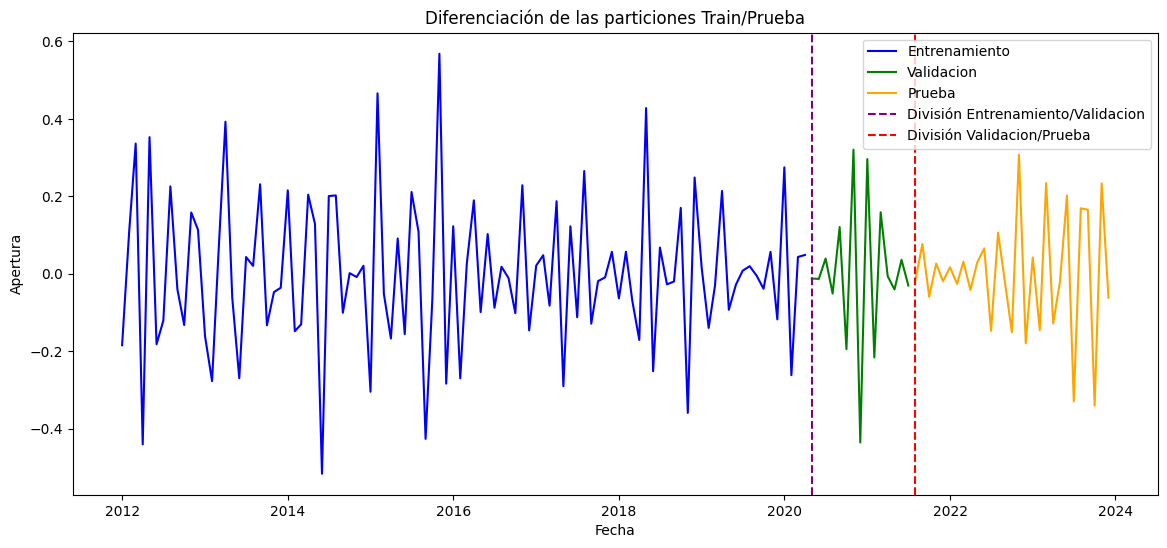

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear la gráfica
plt.figure(figsize=(14, 6))

# Graficar los datos de entrenamiento
plt.plot(train_feature.index, train_feature, label='Entrenamiento', color='blue')

# Graficar los datos de Validacion
plt.plot(val_feature.index, val_feature, label='Validacion', color='green')

# Graficar los datos de prueba
plt.plot(test_feature.index, test_feature, label='Prueba', color='orange')

# Añadir líneas verticales para separar los conjuntos
split_date_val = val_feature.index[0]
plt.axvline(x=split_date_val, color='purple', linestyle='--', label='División Entrenamiento/Validacion')
split_date_test = test_feature.index[0]
plt.axvline(x=split_date_test, color='red', linestyle='--', label='División Validacion/Prueba')

# Configurar el título y las etiquetas
plt.title('Diferenciación de las particiones Train/Prueba')
plt.xlabel('Fecha')
plt.ylabel('Apertura')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

In [34]:
if isinstance(train_feature, pd.Series):
    train_feature = train_feature.to_frame()

if isinstance(val_feature, pd.Series):
    val_feature = val_feature.to_frame()

if isinstance(test_feature, pd.Series):
    test_feature = test_feature.to_frame()

In [35]:
if not isinstance(train_target, pd.Series):
    train_target = pd.Series(train_target)

if not isinstance(val_target, pd.Series):
    val_target = pd.Series(val_target)

if not isinstance(test_target, pd.Series):
    test_target = pd.Series(test_target)

In [36]:
print("Dimensiones de train_feature:", train_feature.shape)
print("Dimensiones de train_target:", train_target.shape)

Dimensiones de train_feature: (100, 1)
Dimensiones de train_target: (100,)


<h2 style="color: #011f4b;">PROBANDO UN ARBOL SENCILLO CON DecisionTreeRegressor</h2> 

In [37]:
from sklearn.tree import DecisionTreeRegressor

DT_Apertura = DecisionTreeRegressor() 
DT_Apertura.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",DT_Apertura.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:",DT_Apertura.score(val_feature,val_target))
print("el RECM sobre validación es:",(((DT_Apertura.predict(val_feature)-val_target)**2).mean()) )

Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de Validación: 0.9962660965325254
el RECM sobre validación es: 0.00012777070067989177


- El R^2 = 1 indica que el modelo está ajustando perfectamente a los datos de entrenamiento, esto significa que el modelo puede explicar el 100% de la variabilidad en este conjunto; sin embargo, esto puede ser señal de sobre ajuste
- El R^2 en el conjunto de validación es considerablemente más bajo que en el conjunto de entrenamiento (0.594 vs 1.0). Esto sugiere que el modelo no generaliza bien a nuevos datos. Aunque todavía está capturando una cantidad significativa de variabilidad (alrededor del 59.4%), la caída en el desempeño comparado con el conjunto de entrenamiento es un indicio de que el modelo podría estar sobre ajustado.
- El RECM (Raíz del Error Cuadrático Medio) es una medida de la magnitud promedio del error de las predicciones del modelo en el conjunto de validación. Un RECM más bajo indica mejores predicciones. En este caso, el RECM de 0.124789 sugiere que, en promedio, las predicciones del modelo están desviándose en alrededor de 0.125 unidades del valor real en el conjunto de validación.

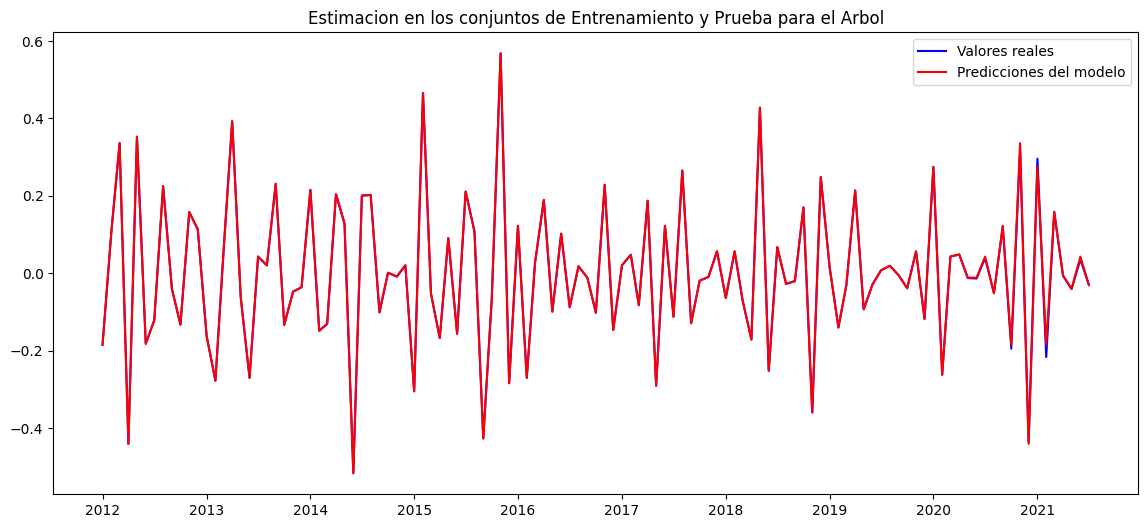

In [38]:
val_predictions = DT_Apertura.predict(np.concatenate([train_feature,val_feature]))

plt.figure(figsize=(14, 6))
plt.plot(np.concatenate([train_feature.index, val_feature.index]), np.concatenate([train_feature,val_feature]), label='Valores reales',color='blue')
plt.plot(np.concatenate([train_feature.index, val_feature.index]), val_predictions, label='Predicciones del modelo', color='red')
plt.title('Estimacion en los conjuntos de Entrenamiento y Prueba para el Arbol')
plt.legend()
plt.show()

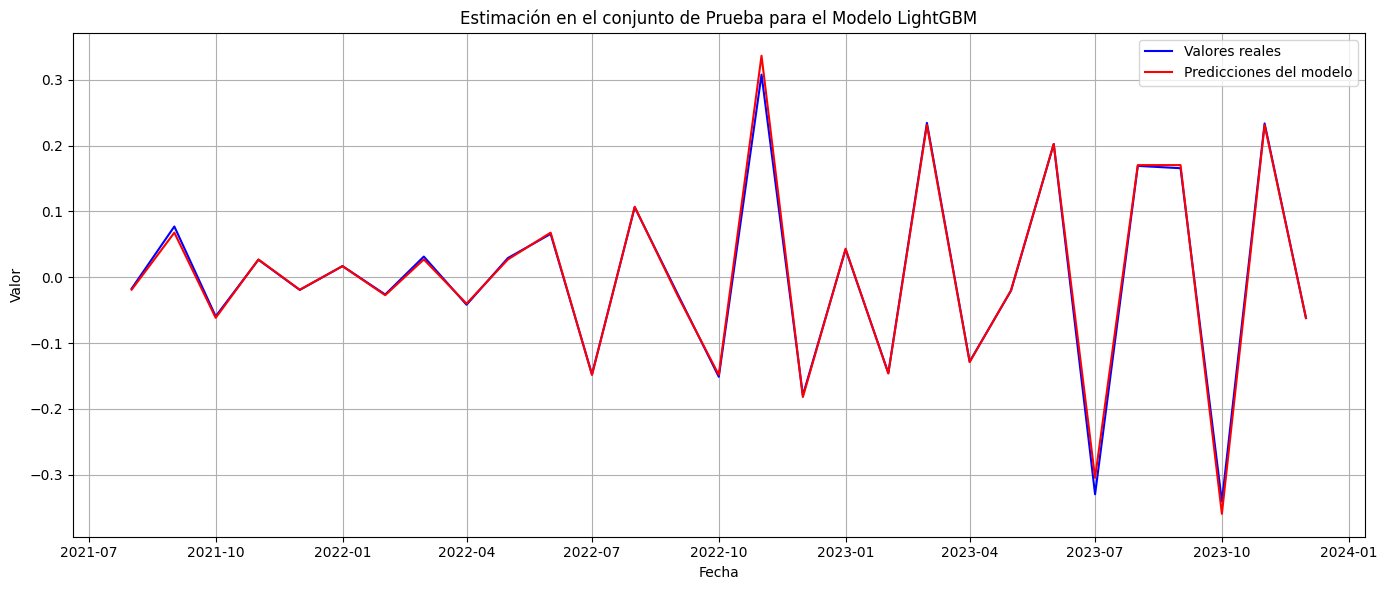

In [39]:
# Make predictions on the test set
test_predictions = DT_Apertura.predict(test_feature)

# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(test_feature.index, test_target, label='Valores reales', color='blue')
plt.plot(test_feature.index, test_predictions, label='Predicciones del modelo', color='red')
plt.title('Estimación en el conjunto de Prueba para el Modelo LightGBM')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<h2 style="color: #011f4b;">PROBANDO UN ARBOL SENCILLO CON LGBMRegressor()</h2> 

In [40]:
from sklearn.tree import DecisionTreeRegressor

DT_Apertura = LGBMRegressor() 
DT_Apertura.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",DT_Apertura.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:",DT_Apertura.score(val_feature,val_target))
print("el RECM sobre validación es:",(((DT_Apertura.predict(val_feature)-val_target)**2).mean()) )

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 35
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 1
[LightGBM] [Info] Start training from score 0.000139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

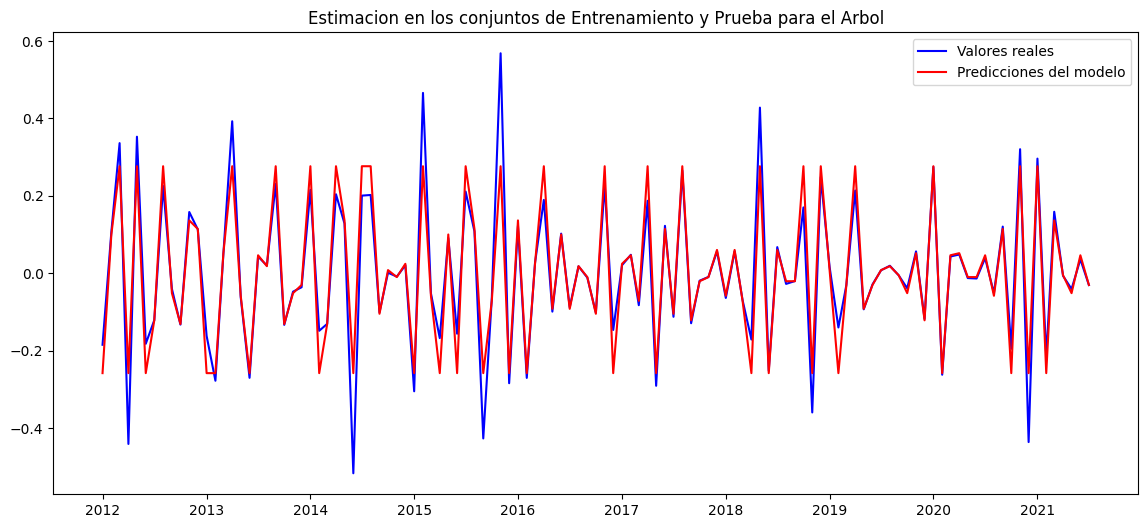

In [41]:
val_predictions = DT_Apertura.predict(np.concatenate([train_feature,val_feature]))

plt.figure(figsize=(14, 6))
plt.plot(np.concatenate([train_feature.index, val_feature.index]), np.concatenate([train_feature,val_feature]), label='Valores reales',color='blue')
plt.plot(np.concatenate([train_feature.index, val_feature.index]), val_predictions, label='Predicciones del modelo', color='red')
plt.title('Estimacion en los conjuntos de Entrenamiento y Prueba para el Arbol')
plt.legend()
plt.show()

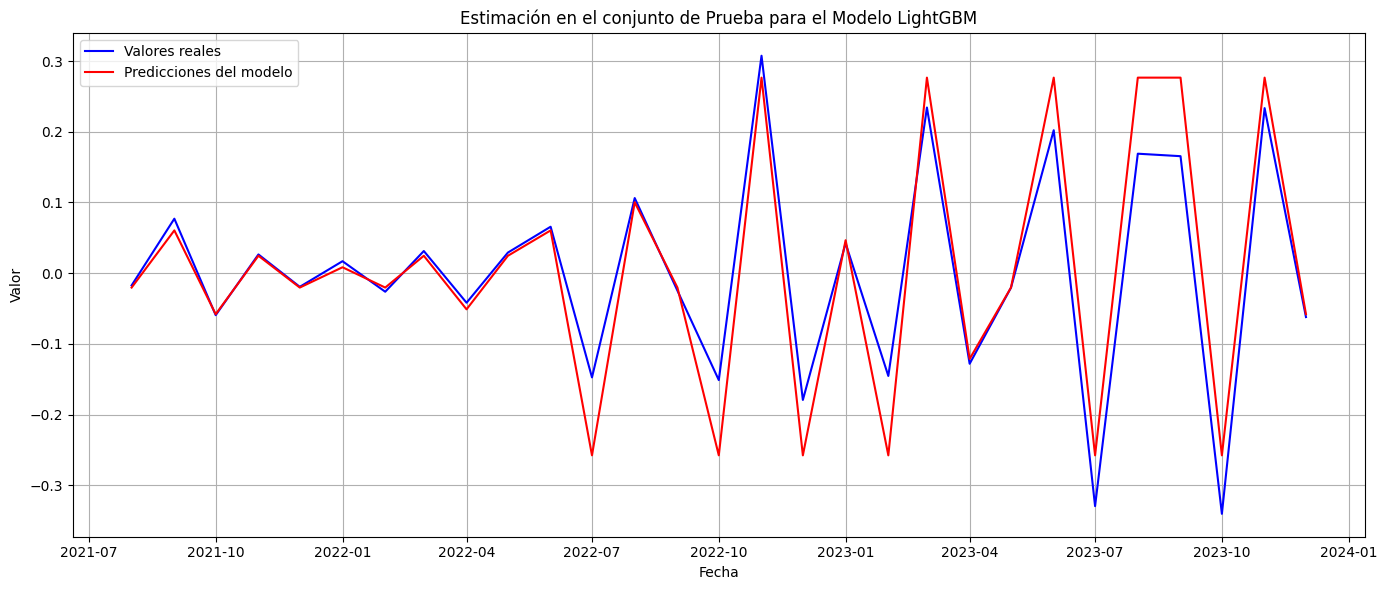

In [42]:
# Make predictions on the test set
test_predictions = DT_Apertura.predict(test_feature)

# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(test_feature.index, test_target, label='Valores reales', color='blue')
plt.plot(test_feature.index, test_predictions, label='Predicciones del modelo', color='red')
plt.title('Estimación en el conjunto de Prueba para el Modelo LightGBM')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<h2 style="color: #011f4b;">CONFIGURACION DE LA GRILLA PARA ENCONTRAR EL MEJOR ARBOL</h2> 

Tenenemos una baga idea de los rezagos que pueden ser elegido para la tarea de entrenar el árbol de decisión por tanto no disponemos a realizar el entrenamiento del arbol de la siguiennte manera: 
 
 - Nos gusta más la idea de usar LGBMRegressor, pero se hicieron pruebas de tiempo, y en 8 horas no pudo correr la mitad los modelos de una grilla pequeña, por lo se plantea utilizar DecissionTreeRegressor en su lugar.  
 - Para la eleccion de los rezagos no tiene mucho sentido pesar en una periodicidad semanal, pero al hacer el análisis del periodo nos encontramos con que el periodo es de 1216 unidades de tiempo lo cual equivale a 3.3 años por lo tanto usaremos ese periodo y trateremos de incluir algunos otros rezagos que pueden resultar utiles basandonos en los demas análisis de periodicidad
     - [1]: El primer rezago, que es crucial según el PACF.
     - [1, 2, 3]: 
     - [1, 2, 3, 6, 12]: 
     - [1, 2, 3, 4, 5, 6]: 
     - [1:12]: 

In [44]:
rezagos = [1, 3, [1, 2, 3, 6, 12], 
           6, 12
          ]

# Definir los hiperparámetros para la búsqueda
hiperparametros = {
    'max_depth': list(range(4, 8)),
    'min_samples_leaf': list(range(5, 15)),
    'ccp_alpha': [0.0, 0.01]
}

In [45]:
DT_Apertura = ForecasterAutoreg(
    regressor = DecisionTreeRegressor(random_state=123),
    lags = 1
)

In [46]:
train_feature_series = train_feature.squeeze()  # Squeeze the DataFrame to a Series
print(train_feature_series.head(5))
val_feature_series = val_feature.squeeze()  # Squeeze the DataFrame to a Series
print(val_feature_series.head(5))

Fecha
2012-01-01   -0.184492
2012-02-01    0.107021
2012-03-01    0.336302
2012-04-01   -0.440628
2012-05-01    0.352852
Name: 0, dtype: float64
Fecha
2020-05-01   -0.012226
2020-06-01   -0.013323
2020-07-01    0.039410
2020-08-01   -0.051023
2020-09-01    0.120693
Name: 0, dtype: float64


In [52]:
TrainVal_Feature = np.concatenate([train_feature_series,val_feature_series])

if not isinstance(TrainVal_Feature, pd.Series):
    TrainVal_Feature = pd.Series(TrainVal_Feature)

TrainVal_Feature

0     -0.184492
1      0.107021
2      0.336302
3     -0.440628
4      0.352852
         ...   
110    0.159025
111   -0.006391
112   -0.040475
113    0.036150
114   -0.030250
Length: 115, dtype: float64

In [53]:
import os
import multiprocessing


num_processors = os.cpu_count()
print(f"Número de procesadores: {num_processors}")
n_jobs = multiprocessing.cpu_count() - 4

Número de procesadores: 8


In [55]:
# Realizar la búsqueda de hiperparámetros usando solo los conjuntos de entrenamiento y validación
tuning = grid_search_forecaster(
    forecaster=DT_Apertura,
    y=TrainVal_Feature,  # Subconjunto de datos con índices de fecha
    param_grid=hiperparametros,
    lags_grid=rezagos,
    steps= 29,
    metric='mean_squared_error',
    initial_train_size=int(len(TrainVal_Feature) * 0.8),
    fixed_train_size=False,
    return_best=True,
    verbose=False,
    show_progress=True,
    n_jobs=n_jobs  # Añadimos el parámetro n_jobs para paralelización
)

Number of models compared: 400.


lags grid:   0%|          | 0/5 [00:00<?, ?it/s]

params grid:   0%|          | 0/80 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  6 12] 
  Parameters: {'ccp_alpha': 0.0, 'max_depth': 7, 'min_samples_leaf': 14}
  Backtesting metric: 0.018380431769960393



In [56]:
tuning = tuning.sort_values(by = ['mean_squared_error', 'max_depth', 'min_samples_leaf'])
tuning

lags  \
329  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]   
169                         [1, 2, 3, 6, 12]   
339  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]   
179                         [1, 2, 3, 6, 12]   
189                         [1, 2, 3, 6, 12]   
..                                       ...   
111                                [1, 2, 3]   
82                                 [1, 2, 3]   
190                         [1, 2, 3, 6, 12]   
180                         [1, 2, 3, 6, 12]   
191                         [1, 2, 3, 6, 12]   

                                  lags_label  \
329  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]   
169                         [1, 2, 3, 6, 12]   
339  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]   
179                         [1, 2, 3, 6, 12]   
189                         [1, 2, 3, 6, 12]   
..                                       ...   
111                                [1, 2, 3]   
82                                 [1, 2, 3]   
190                         [1, 2, 3, 6, 12]   
180                         [1, 2, 3, 6, 12]   
191                         [1, 2, 3, 6, 12]   

                                                params  mean_squared_error  \
329  {'ccp_alpha': 0.0, 'max_depth': 4, 'min_sample...            0.018380   
169  {'ccp_alpha': 0.0, 'max_depth': 4, 'min_sample...            0.018380   
339  {'ccp_alpha': 0.0, 'max_depth': 5, 'min_sample...            0.018380   
179  {'ccp_alpha': 0.0, 'max_depth': 5, 'min_sample...            0.018380   
189  {'ccp_alpha': 0.0, 'max_depth': 6, 'min_sample...            0.018380   
..                                                 ...                 ...   
111  {'ccp_alpha': 0.0, 'max_depth': 7, 'min_sample...            0.057248   
82   {'ccp_alpha': 0.0, 'max_depth': 4, 'min_sample...            0.057340   
190  {'ccp_alpha': 0.0, 'max_depth': 7, 'min_sample...            0.067727   
180  {'ccp_alpha': 0.0, 'max_depth': 6, 'min_sample...            0.072802   
191  {'ccp_alpha': 0.0, 'max_depth': 7, 'min_sample...            0.084322   

     ccp_alpha  max_depth  min_samples_leaf  
329        0.0        4.0              14.0  
169        0.0        4.0              14.0  
339        0.0        5.0              14.0  
179        0.0        5.0              14.0  
189        0.0        6.0              14.0  
..         ...        ...               ...  
111        0.0        7.0               6.0  
82         0.0        4.0               7.0  
190        0.0        7.0               5.0  
180        0.0        6.0               5.0  
191        0.0        7.0               6.0  

[400 rows x 7 columns]

In [57]:
tuning = tuning[0:1]
tuning['model'] = 'decission tree'
tuning

lags  \
329  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]   

                                  lags_label  \
329  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]   

                                                params  mean_squared_error  \
329  {'ccp_alpha': 0.0, 'max_depth': 4, 'min_sample...             0.01838   

     ccp_alpha  max_depth  min_samples_leaf           model  
329        0.0        4.0              14.0  decission tree

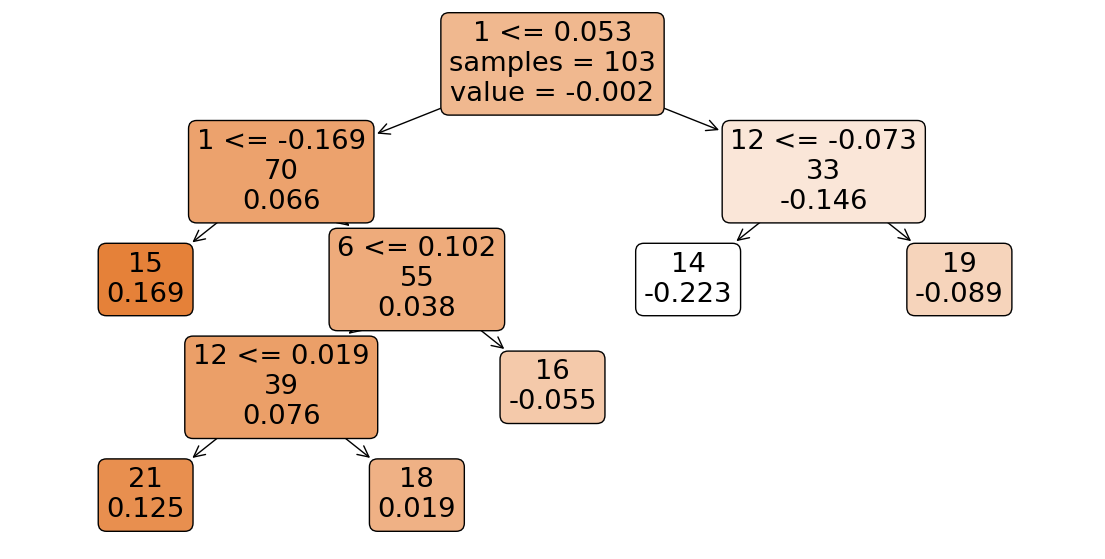

In [58]:
# Crear una visualización del árbol
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Crear una visualización del árbol
plt.figure(figsize=(14,7))
plot_tree(DT_Apertura.regressor,
          filled=True, feature_names=DT_Apertura.lags, rounded=True,
          impurity=False, label='root')
plt.show()

In [59]:
DT_Apertura.get_feature_importances()['importance']

0    0.728997
4    0.153783
3    0.117220
1    0.000000
2    0.000000
Name: importance, dtype: float64

In [60]:
DT_Apertura = ForecasterAutoreg(
    regressor = DecisionTreeRegressor(max_depth=4, min_samples_leaf=14),
    lags = 12
)
DT_Apertura.fit(TrainVal_Feature)

In [61]:
DT_Apertura

ForecasterAutoreg 
Regressor: DecisionTreeRegressor(max_depth=4, min_samples_leaf=14) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
Transformer for y: None 
Transformer for exog: None 
Window size: 12 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Exogenous variables names: None 
Training range: [0, 114] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 14, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'} 
fit_kwargs: {} 
Creation date: 2024-09-04 08:39:19 
Last fit date: 2024-09-04 08:39:19 
Skforecast version: 0.13.0 
Python version: 3.12.4 
Forecaster id: None 

In [62]:
# Concatenar los índices de train_feature y val_feature
new_index = np.concatenate([train_feature.index, val_feature.index])

# Asignar el nuevo índice a TrainVal_Feature
TrainVal_Feature.index = new_index

# Asegurarse de que el índice esté ordenado
TrainVal_Feature.sort_index(inplace=True)

# Mostrar los primeros registros para verificar
print(TrainVal_Feature.head())

# Mostrar información sobre el DataFrame
print(TrainVal_Feature.info())

2012-01-01   -0.184492
2012-02-01    0.107021
2012-03-01    0.336302
2012-04-01   -0.440628
2012-05-01    0.352852
dtype: float64
<class 'pandas.core.series.Series'>
DatetimeIndex: 115 entries, 2012-01-01 to 2021-07-01
Series name: None
Non-Null Count  Dtype  
--------------  -----  
115 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB
None


In [63]:
#int(len(test_feature))
print(TrainVal_Feature.head(5))
print(test_feature.head(5))

2012-01-01   -0.184492
2012-02-01    0.107021
2012-03-01    0.336302
2012-04-01   -0.440628
2012-05-01    0.352852
dtype: float64
                   0
Fecha               
2021-08-01 -0.017308
2021-09-01  0.077064
2021-10-01 -0.059400
2021-11-01  0.026500
2021-12-01 -0.019317


In [64]:
# Predecir los siguientes 29 valores, que corresponden al tamaño de tu conjunto de prueba
n_steps = 29
test_prediction = DT_Apertura.predict(steps=n_steps)

In [65]:
# Evaluar el rendimiento de las predicciones
# test_target: serie temporal con los valores reales de prueba
test_target = test_feature

test_rmse = mean_squared_error(test_target, test_prediction, squared=False)
print("Predicciones para el conjunto de prueba:", test_prediction)
print("Raíz del Error Cuadrático Medio (RMSE) - Prueba:", test_rmse)

Predicciones para el conjunto de prueba: 115    0.124778
116   -0.088886
117    0.124778
118   -0.088886
119    0.124778
120   -0.088886
121   -0.055031
122    0.018623
123   -0.055031
124    0.124778
125   -0.088886
126    0.124778
127   -0.088886
128    0.124778
129   -0.088886
130   -0.055031
131    0.018623
132   -0.055031
133    0.124778
134   -0.088886
135    0.124778
136   -0.088886
137    0.124778
138   -0.088886
139   -0.055031
140    0.018623
141   -0.055031
142    0.124778
143   -0.088886
Name: pred, dtype: float64
Raíz del Error Cuadrático Medio (RMSE) - Prueba: 0.18152622286107714


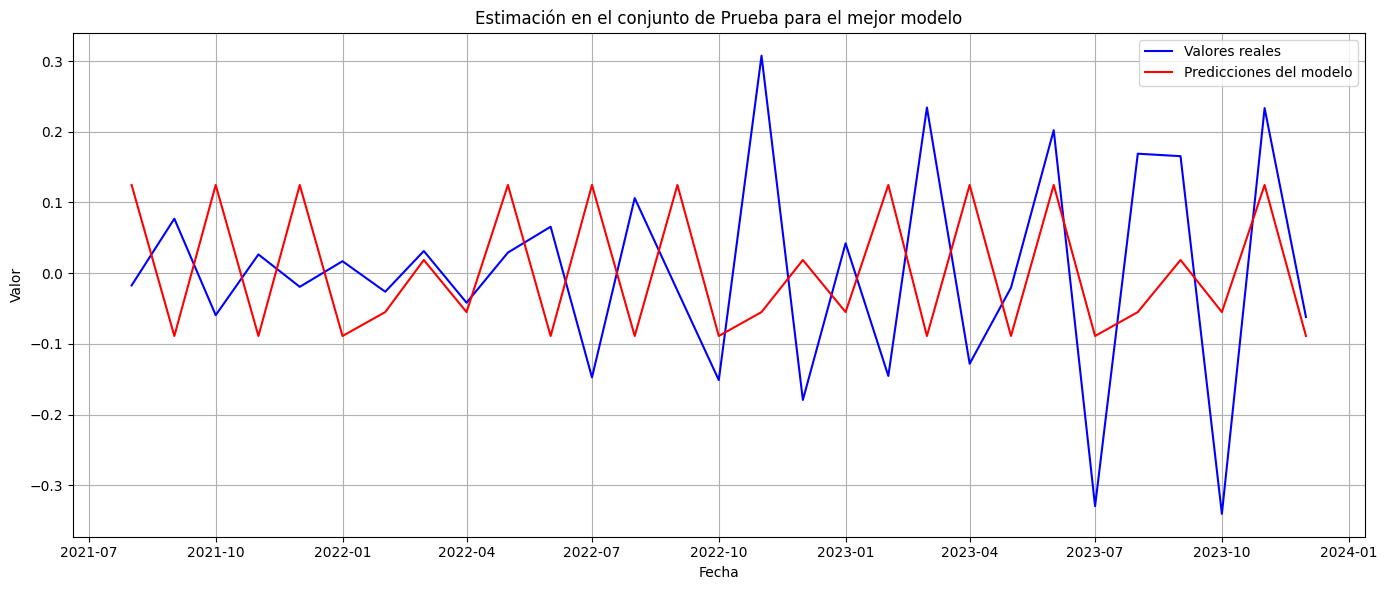

In [66]:
# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(test_feature.index, test_target, label='Valores reales', color='blue')
plt.plot(test_feature.index, test_prediction, label='Predicciones del modelo', color='red')
plt.title('Estimación en el conjunto de Prueba para el mejor modelo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [67]:
MSE = mean_squared_error(y_true= test_target, y_pred=test_prediction)

tuning['MSE test'] =  MSE
tuning

lags  \
329  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]   

                                  lags_label  \
329  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]   

                                                params  mean_squared_error  \
329  {'ccp_alpha': 0.0, 'max_depth': 4, 'min_sample...             0.01838   

     ccp_alpha  max_depth  min_samples_leaf           model  MSE test  
329        0.0        4.0              14.0  decission tree  0.032952

In [72]:
# Prediction intervals

predictions = DT_Apertura.predict_interval(
                    steps    = 29,
                    interval = [5, 95],
                    n_boot   = 1000
              )

# Add datetime index to predictions
#predictions = pd.DataFrame(data=predictions, index=test_target.index)
predictions.head()

pred  lower_bound  upper_bound
115  0.124778    -0.097530     0.383990
116 -0.088886    -0.304623     0.142329
117  0.124778    -0.290377     0.386260
118 -0.088886    -0.278427     0.248754
119  0.124778    -0.353477     0.342266

In [73]:
# Crear DataFrame con predicciones, usando directamente el índice de test_target
predictions_df = pd.DataFrame(data=predictions)
predictions_df.index = test_target.index

print(predictions_df.head())

                pred  lower_bound  upper_bound
Fecha                                         
2021-08-01  0.124778    -0.097530     0.383990
2021-09-01 -0.088886    -0.304623     0.142329
2021-10-01  0.124778    -0.290377     0.386260
2021-11-01 -0.088886    -0.278427     0.248754
2021-12-01  0.124778    -0.353477     0.342266


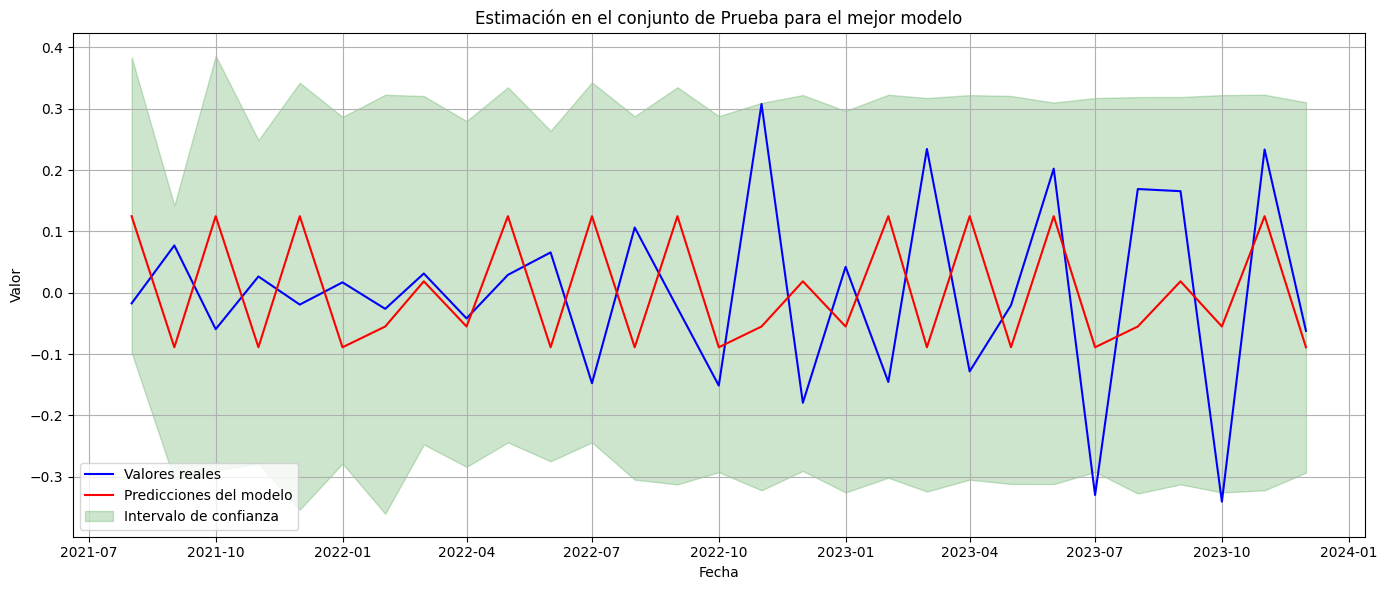

In [74]:
import matplotlib.pyplot as plt

# Crear la figura
plt.figure(figsize=(14, 6))

# Graficar los valores reales
plt.plot(test_feature.index, test_target, label='Valores reales', color='blue')

# Graficar las predicciones del modelo
plt.plot(predictions_df.index, predictions_df['pred'], label='Predicciones del modelo', color='red')

# Graficar el intervalo de confianza
plt.fill_between(
    predictions_df.index,
    predictions_df['lower_bound'],
    predictions_df['upper_bound'],
    color='green',
    alpha=0.2,
    label='Intervalo de confianza'
)

# Configurar etiquetas y leyenda
plt.title('Estimación en el conjunto de Prueba para el mejor modelo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


<center><h1 style="color: #011f4b;">ÁRBOLES DE DEDICIÓN SERIE DIFERENCIADA</h1></center>

In [77]:
diff_df.info

<bound method DataFrame.info of          Fecha  Diff_BoxCox
1   2012-02-01     0.390986
2   2012-03-01     0.322337
3   2012-04-01    -0.677456
4   2012-05-01     1.304041
5   2012-06-01    -0.007198
..         ...          ...
139 2023-08-01    12.956319
140 2023-09-01    -0.351274
141 2023-10-01   -12.447335
142 2023-11-01    13.744967
143 2023-12-01    -0.880470

[143 rows x 2 columns]>

In [78]:
VAFODO_df = pd.DataFrame({'Fecha': diff_df['Fecha'] , 'VAFODO': diff_df['Diff_BoxCox']}) 
VAFODO_df.head()

Fecha    VAFODO
1 2012-02-01  0.390986
2 2012-03-01  0.322337
3 2012-04-01 -0.677456
4 2012-05-01  1.304041
5 2012-06-01 -0.007198

In [79]:
Serie = pd.Series(VAFODO_df['VAFODO'].values, index = VAFODO_df['Fecha']) 
print(Serie.head())
type(Serie)

Fecha
2012-02-01    0.390986
2012-03-01    0.322337
2012-04-01   -0.677456
2012-05-01    1.304041
2012-06-01   -0.007198
dtype: float64


pandas.core.series.Series

In [80]:
print('Complete Observations for Target after Supervised configuration: %d' %len(Serie))
traintarget_size = int(len(Serie) * 0.70) 
valtarget_size = int(len(Serie) * 0.10)# Set split
testtarget_size = int(len(Serie) * 0.20)# Set split
print(traintarget_size,valtarget_size,testtarget_size)
print('Train + Validation + Test: %d' %(traintarget_size+valtarget_size+testtarget_size))

Complete Observations for Target after Supervised configuration: 143
100 14 28
Train + Validation + Test: 142


In [82]:
traintarget_size = int(len(Serie) * 0.70) 
valtarget_size = int(len(Serie) * 0.10)+1# Set split
testtarget_size = int(len(Serie) * 0.20)# Set split
train_target, val_target,test_target = Serie[0:traintarget_size],Serie[(traintarget_size):(traintarget_size+valtarget_size)] ,Serie[(traintarget_size+valtarget_size):len(Serie)]

print('Observations for Target: %d' % (len(Serie)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Validation Observations for Target: %d' % (len(val_target)))
print('Test Observations for Target: %d' % (len(test_target)))

Observations for Target: 143
Training Observations for Target: 100
Validation Observations for Target: 15
Test Observations for Target: 28


In [83]:
# Features Train--Val-Test split

trainfeature_size = int(len(Serie) * 0.70)
valfeature_size = int(len(Serie) * 0.10)+1# Set split
testfeature_size = int(len(Serie) * 0.20)# Set split
train_feature, val_feature,test_feature =Serie[0:traintarget_size],Serie[(traintarget_size):(traintarget_size+valtarget_size)] ,Serie[(traintarget_size+valtarget_size):len(Serie)]

print('Observations for Feature: %d' % (len(Serie)))
print('Training Observations for Feature: %d' % (len(train_feature)))
print('Validation Observations for Feature: %d' % (len(val_feature)))
print('Test Observations for Feature: %d' % (len(test_feature)))

Observations for Feature: 143
Training Observations for Feature: 100
Validation Observations for Feature: 15
Test Observations for Feature: 28


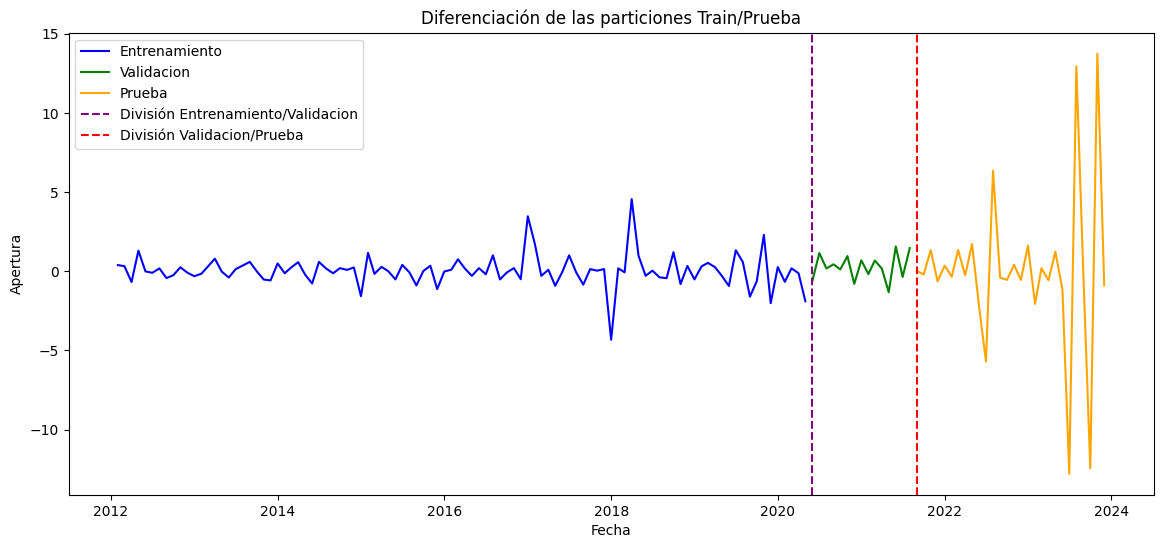

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear la gráfica
plt.figure(figsize=(14, 6))

# Graficar los datos de entrenamiento
plt.plot(train_feature.index, train_feature, label='Entrenamiento', color='blue')

# Graficar los datos de Validacion
plt.plot(val_feature.index, val_feature, label='Validacion', color='green')

# Graficar los datos de prueba
plt.plot(test_feature.index, test_feature, label='Prueba', color='orange')

# Añadir líneas verticales para separar los conjuntos
split_date_val = val_feature.index[0]
plt.axvline(x=split_date_val, color='purple', linestyle='--', label='División Entrenamiento/Validacion')
split_date_test = test_feature.index[0]
plt.axvline(x=split_date_test, color='red', linestyle='--', label='División Validacion/Prueba')

# Configurar el título y las etiquetas
plt.title('Diferenciación de las particiones Train/Prueba')
plt.xlabel('Fecha')
plt.ylabel('Apertura')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

In [85]:
if isinstance(train_feature, pd.Series):
    train_feature = train_feature.to_frame()

if isinstance(val_feature, pd.Series):
    val_feature = val_feature.to_frame()

if isinstance(test_feature, pd.Series):
    test_feature = test_feature.to_frame()

In [86]:
if not isinstance(train_target, pd.Series):
    train_target = pd.Series(train_target)

if not isinstance(val_target, pd.Series):
    val_target = pd.Series(val_target)

if not isinstance(test_target, pd.Series):
    test_target = pd.Series(test_target)

In [87]:
print("Dimensiones de train_feature:", train_feature.shape)
print("Dimensiones de train_target:", train_target.shape)

Dimensiones de train_feature: (100, 1)
Dimensiones de train_target: (100,)


<h2 style="color: #011f4b;">PROBANDO UN ARBOL SENCILLO CON DecisionTreeRegressor</h2>

In [88]:
from sklearn.tree import DecisionTreeRegressor

DT_Apertura = DecisionTreeRegressor() 
DT_Apertura.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",DT_Apertura.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:",DT_Apertura.score(val_feature,val_target))
print("el RECM sobre validación es:",(((DT_Apertura.predict(val_feature)-val_target)**2).mean()) )

Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de Validación: 0.9904160457045692
el RECM sobre validación es: 0.006251545180231883


- El R^2 = 1 indica que el modelo está ajustando perfectamente a los datos de entrenamiento, esto significa que el modelo puede explicar el 100% de la variabilidad en este conjunto; sin embargo, esto puede ser señal de sobre ajuste
- El R^2 en el conjunto de validación no solamente es considerablemente más bajo que en el conjunto de entrenamiento  sino que es negativo (-0.367 vs 1.0). Esto sugiere que el modelo no generaliza bien a nuevos datos. La caída en el desempeño comparado con el conjunto de entrenamiento es un indicio de que el modelo podría estar sobre ajustado.
- El RECM (Raíz del Error Cuadrático Medio) es una medida de la magnitud promedio del error de las predicciones del modelo en el conjunto de validación. Un RECM más bajo indica mejores predicciones. En este caso, el RECM de 0.0379 sugiere que, en promedio, las predicciones del modelo están desviándose en alrededor de 3.79 unidades del valor real en el conjunto de validación.

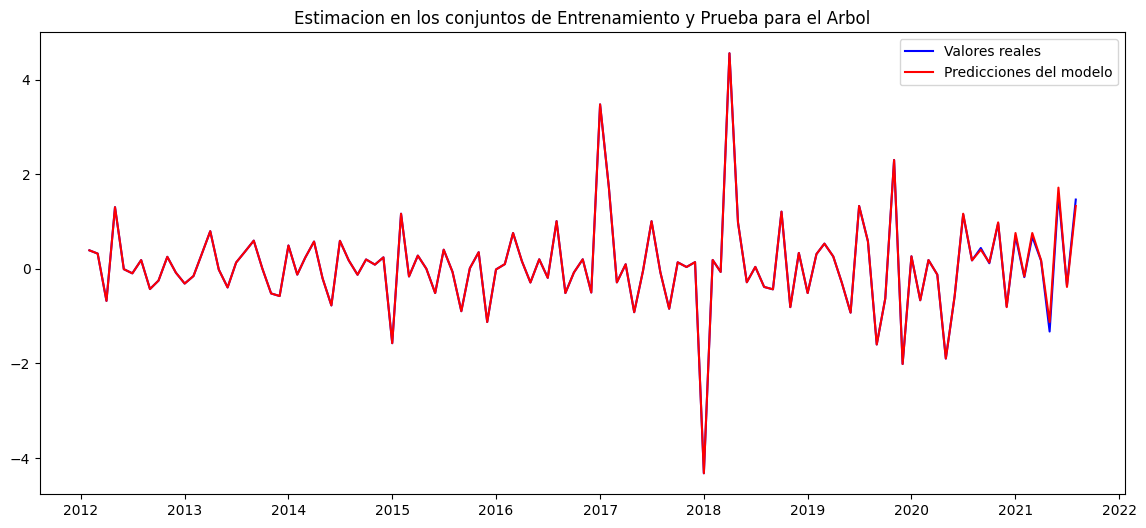

In [89]:
val_predictions = DT_Apertura.predict(np.concatenate([train_feature,val_feature]))

plt.figure(figsize=(14, 6))
plt.plot(np.concatenate([train_feature.index, val_feature.index]), np.concatenate([train_feature,val_feature]), label='Valores reales',color='blue')
plt.plot(np.concatenate([train_feature.index, val_feature.index]), val_predictions, label='Predicciones del modelo', color='red')
plt.title('Estimacion en los conjuntos de Entrenamiento y Prueba para el Arbol')
plt.legend()
plt.show()

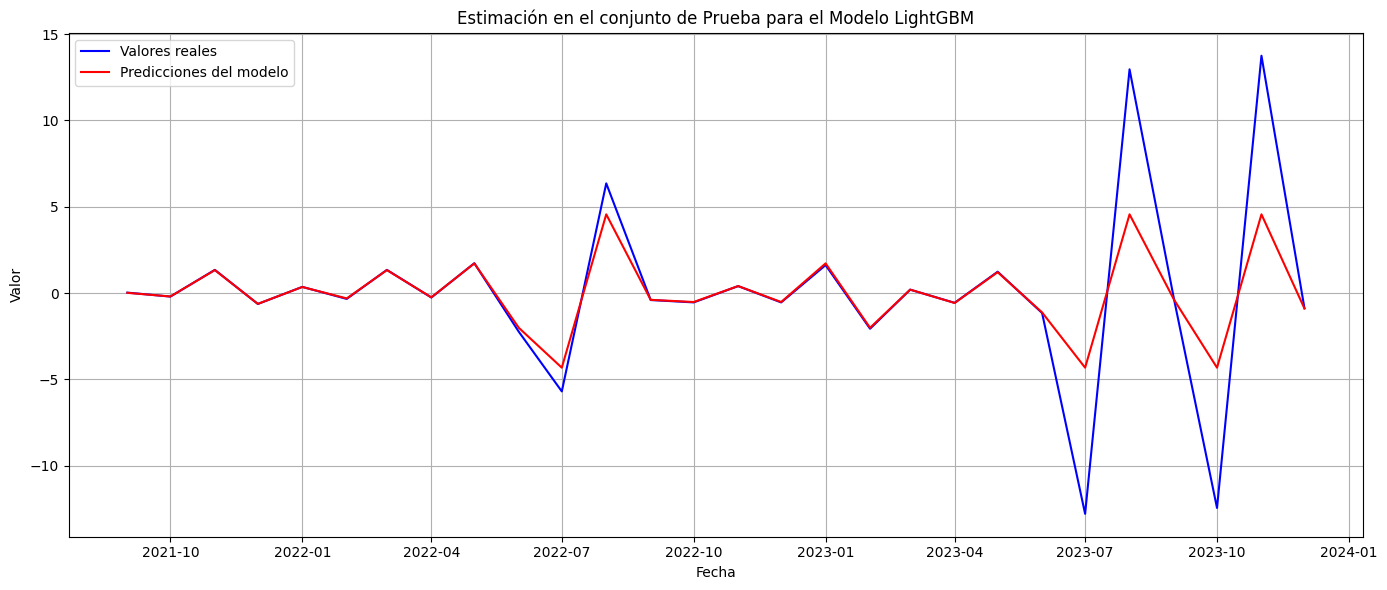

In [90]:
# Make predictions on the test set
test_predictions = DT_Apertura.predict(test_feature)

# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(test_feature.index, test_target, label='Valores reales', color='blue')
plt.plot(test_feature.index, test_predictions, label='Predicciones del modelo', color='red')
plt.title('Estimación en el conjunto de Prueba para el Modelo LightGBM')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<h2 style="color: #011f4b;">PROBANDO UN ARBOL SENCILLO CON LGBMRegressor()</h2>

In [91]:
from sklearn.tree import DecisionTreeRegressor

DT_Apertura = LGBMRegressor() 
DT_Apertura.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",DT_Apertura.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:",DT_Apertura.score(val_feature,val_target))
print("el RECM sobre validación es:",(((DT_Apertura.predict(val_feature)-val_target)**2).mean()) )

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 35
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 1
[LightGBM] [Info] Start training from score 0.038489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

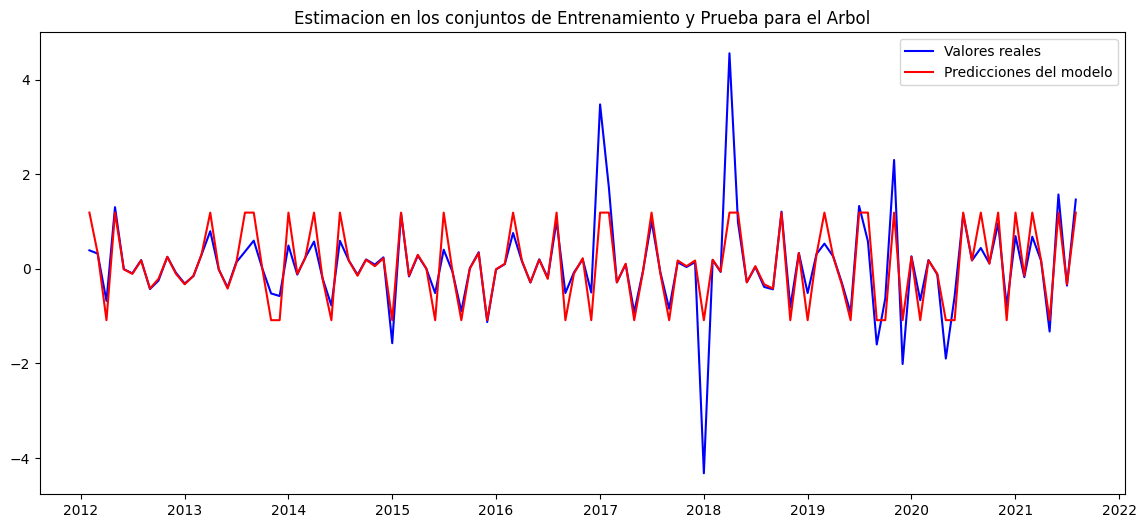

In [92]:
val_predictions = DT_Apertura.predict(np.concatenate([train_feature,val_feature]))

plt.figure(figsize=(14, 6))
plt.plot(np.concatenate([train_feature.index, val_feature.index]), np.concatenate([train_feature,val_feature]), label='Valores reales',color='blue')
plt.plot(np.concatenate([train_feature.index, val_feature.index]), val_predictions, label='Predicciones del modelo', color='red')
plt.title('Estimacion en los conjuntos de Entrenamiento y Prueba para el Arbol')
plt.legend()
plt.show()

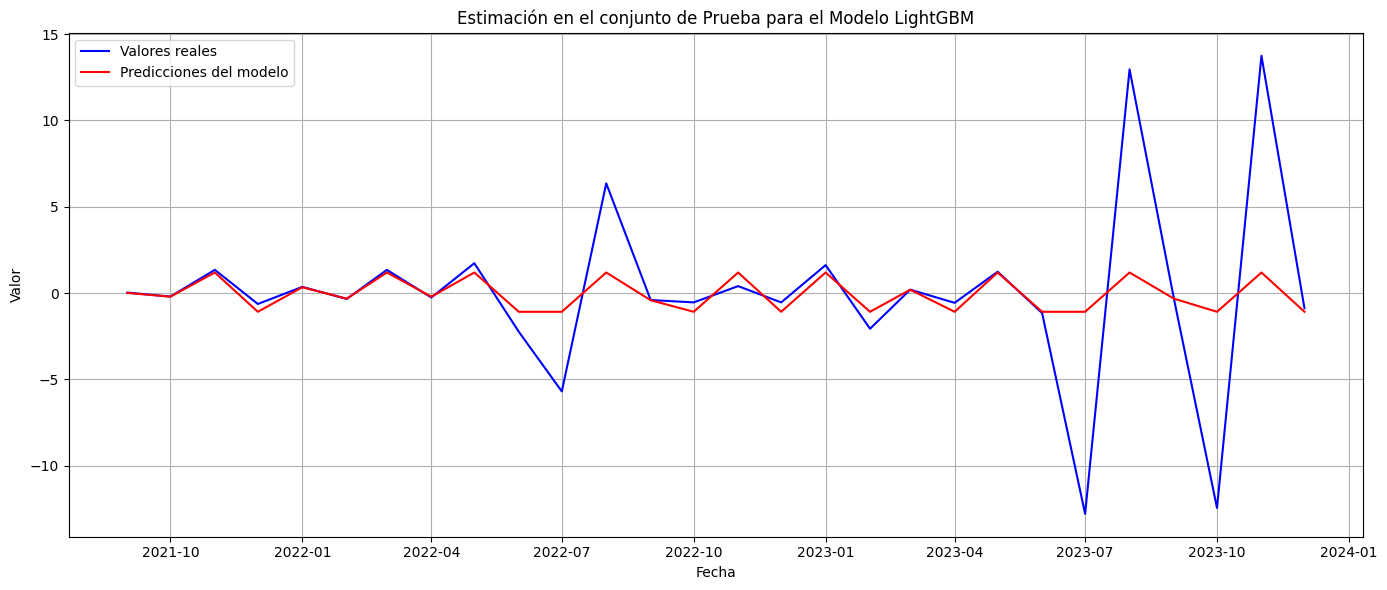

In [93]:
# Make predictions on the test set
test_predictions = DT_Apertura.predict(test_feature)

# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(test_feature.index, test_target, label='Valores reales', color='blue')
plt.plot(test_feature.index, test_predictions, label='Predicciones del modelo', color='red')
plt.title('Estimación en el conjunto de Prueba para el Modelo LightGBM')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<h2 style="color: #011f4b;">CONFIGURACION DE LA GRILLA PARA ENCONTRAR EL MEJOR ARBOL</h2>

Tenenemos una baga idea de los rezagos que pueden ser elegido para la tarea de entrenar el árbol de decisión por tanto no disponemos a realizar el entrenamiento del arbol de la siguiennte manera: 
 
 - Nos gusta más la idea de usar LGBMRegressor, pero se hicieron pruebas de tiempo, y en 8 horas no pudo correr la mitad los modelos de una grilla pequeña, por lo se plantea utilizar DecissionTreeRegressor en su lugar.  
 - Para la eleccion de los rezagos no tiene mucho sentido pesar en una periodicidad semanal, pero al hacer el análisis del periodo nos encontramos con que el periodo es de 1216 unidades de tiempo lo cual equivale a 3.3 años por lo tanto usaremos ese periodo y trateremos de incluir algunos otros rezagos que pueden resultar utiles basandonos en los demas análisis de periodicidad
     - [1]: El primer rezago, que es crucial según el PACF.
     - [1, 2, 3]: 
     - [1, 2, 3, 6, 12]: 
     - [1, 2, 3, 4, 5, 6]: 
     - [1:12]: 
[1:12]:

In [ ]:
rezagos = [1, 3, [1, 2, 3, 6, 12], 
           6, 12
          ]

# Definir los hiperparámetros para la búsqueda
hiperparametros = {
    'max_depth': list(range(4, 8)),
    'min_samples_leaf': list(range(5, 15)),
    'ccp_alpha': [0.0, 0.01]
}

In [ ]:
DT_Apertura = ForecasterAutoreg(
    regressor = DecisionTreeRegressor(random_state=123),
    lags = 1
)

In [ ]:
train_feature_series = train_feature.squeeze()  # Squeeze the DataFrame to a Series
print(train_feature_series.head(5))
val_feature_series = val_feature.squeeze()  # Squeeze the DataFrame to a Series
print(val_feature_series.head(5))

In [ ]:
TrainVal_Feature = np.concatenate([train_feature_series,val_feature_series])

if not isinstance(TrainVal_Feature, pd.Series):
    TrainVal_Feature = pd.Series(TrainVal_Feature)

TrainVal_Feature

In [ ]:
import os
import multiprocessing


num_processors = os.cpu_count()
print(f"Número de procesadores: {num_processors}")
n_jobs = multiprocessing.cpu_count() - 4

In [ ]:
from matplotlib import pyplot as plt
import sklearn.metrics

# Use the best max_depth 
VAFODO_DT3 = DecisionTreeRegressor(ccp_alpha= 0.003077)  # Rellena aquí el mejor alpha de poda

# Ajustar el modelo con los datos de entrenamiento y validación combinados
VAFODO_DT3.fit(train_val_feature, train_val_target)

# Predecir valores para entrenamiento y prueba
train_val_prediction_prun_mincost = VAFODO_DT3.predict(train_val_feature)
test_prediction_prun_mincost = VAFODO_DT3.predict(test_feature)

# Calcular y mostrar las métricas de pérdida cuadrática
train_val_rmse_prun_mincost = sklearn.metrics.mean_squared_error(train_val_prediction_prun_mincost, train_val_target, squared=False)
test_rmse_prun_mincost = sklearn.metrics.mean_squared_error(test_prediction_prun_mincost, test_target, squared=False)

print("Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento:", train_val_rmse_prun_mincost)
print("Raíz del Error Cuadrático Medio (RMSE) - Prueba:", test_rmse_prun_mincost)

In [ ]:
# Crear el gráfico de dispersión mejorado
plt.figure(figsize=(10, 6))

# Scatter plot para datos de entrenamiento
plt.scatter(train_val_prediction_prun_mincost, train_val_target, color='blue', alpha=0.7, label='Train')

# Scatter plot para datos de prueba
plt.scatter(test_prediction_prun_mincost, test_target, color='orange', alpha=0.7, label='Test')

# Agregar etiquetas y título
plt.title('Predicted vs Actual Values (Train vs Test)', fontsize=12)
plt.xlabel('Predicted OPEN', fontsize=10)
plt.ylabel('Actual OPEN', fontsize=10)
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Lista de características y respuesta
listacaract = list(df1.columns.values)
respuesta = listacaract.pop()  # Suponemos que 'respuesta' es el nombre de la columna que quieres predecir

# Crear el árbol de decisión
AperturaDT1 = DecisionTreeRegressor(max_depth= 3)  # Aquí debes definir tu modelo DecisionTreeRegressor
AperturaDT1.fit(df1[listacaract], df1[respuesta])

# Mostrar el texto de representación del árbol
text_representation = tree.export_text(AperturaDT1)
print(text_representation)

In [ ]:
# Configurar y mostrar el gráfico del árbol de decisión
plt.figure(figsize=(12, 12))
_ = tree.plot_tree(AperturaDT1, 
                   feature_names=listacaract, fontsize = 8, 
                   filled=True)

# Mostrar el gráfico
plt.show()

In [ ]:
print(train_val_prediction.size)
print(train_val_target.size)

print(test_prediction.size)
print(test_target.size)

In [ ]:
indicetrian_val_test=df1.index
print(indicetrian_val_test.size)
indicetrain_val=indicetrian_val_test[0:2622]
indicetest=indicetrian_val_test[2622:3648]

In [ ]:
print(indicetrain_val.size)
print(indicetest.size)

In [ ]:
targetjoint=np.concatenate((train_val_target,test_target))
predictionjoint=np.concatenate((train_val_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

In [ ]:
# Recortar el índice para que coincida con la longitud de los datos
indicetrian_val_test_recortado = indicetrian_val_test[:123]

# Crear el DataFrame utilizando los datos y el índice recortados
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred = pd.DataFrame(data=d, index=indicetrian_val_test_recortado)

# Mostrar el DataFrame resultante
print(ObsvsPred.head(10))

In [ ]:
import matplotlib.pyplot as plt

# Configuración de la figura y estilo de línea
plt.figure(figsize=(12, 6))  # Tamaño de la figura

# Gráfico de líneas para las columnas 'observado' y 'Predicción'
plt.plot(ObsvsPred['observado'], label='Observado', color='blue', linestyle='-')
plt.plot(ObsvsPred['Predicción'], label='Predicción', color='orange', linestyle='-')

# Agregar título y etiquetas de los ejes
plt.title('Comparación entre Observado y Predicción', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Valor', fontsize=12)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Configuración del gráfico utilizando Pandas plot y Matplotlib
ax = ObsvsPred.plot(marker=".", figsize=(12, 8), linewidth= 1, color=['blue', 'orange'])  # Cambiar colores de 'observado' y 'predicción'

# Añadir línea vertical en una fecha específica
fecha_vertical = indicetrian_val_test[86].date()  # Fecha específica para la línea vertical
ax.axvline(x=fecha_vertical, color='red', linestyle='--', linewidth=1, label='Fecha Específica')

# Ajustar etiquetas y título del gráfico
plt.title('Observado vs Predicción con Línea Vertical', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Valor', fontsize=12)

# Añadir leyenda al gráfico
plt.legend()

# Mostrar el gráfico
plt.show()

Ahora, para deshacer las transformaciones hechas a la serie y visualizar el resultado en la escala original procedemos a realizar las operaciones inversas a las que hemos aplicado tanto para la serie orginal como para las predicciones. 
 - Para empezar podemos tomar la serie BoxCox antes de la sustracción de la tendencia por Kernel
 - En segundo lugar se hace la operacion inversa de la transformacion de BoxCox

In [ ]:
from scipy.special import inv_boxcox

# Si tu lambda original era lambda_boxcox
lambda_boxcox = 0.40834707479923404  
series_original = inv_boxcox(serie_boxcox, lambda_boxcox)
print(series_original)

In [ ]:
ObsvsPred['Predicción'].shape

In [ ]:
trend_spline.shape

In [ ]:
PredCT = ObsvsPred['Predicción'] + trend_spline[21:]
print(PredCT)

In [ ]:
PredOrig = inv_boxcox(PredCT, lambda_boxcox)
print(PredOrig)

In [ ]:
d_original = {'observado_original': series_original[21:], 'Predicción': PredOrig}
ObsvsPred_original = pd.DataFrame(data=d_original, index=indicetrian_val_test_recortado)

In [ ]:
import matplotlib.pyplot as plt

# Configuración de la figura y estilo de línea
plt.figure(figsize=(12, 6))  # Tamaño de la figura

# Gráfico de líneas para las columnas 'observado' y 'Predicción'
plt.plot(ObsvsPred_original['observado_original'], label='Observado Orig', color='blue', linestyle='-')
plt.plot(ObsvsPred_original['Predicción'], label='Predicción', color='orange', linestyle='-')

# Agregar título y etiquetas de los ejes
plt.title('Comparación entre Observado y Predicción en escala Original', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Valor', fontsize=12)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

Con esto ultimo, podemos conluir que el modelo de arboles se ajusta bastante bien a nuestra serie, sin embargo aun quedan otros modelos por probar antes de decidir cual sería el mejor para nuesta serie